In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'

namesToMethod =['sepal-legth','sepal-width','petal-length','petal-width','class']

dataset = pd.read_csv(url,names = namesToMethod)
dataset



print(dataset)


,sepal-legth,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
print(dataset.shape)

(150, 5)


In [5]:
print(dataset.head)

<bound method NDFrame.head of      sepal-legth  sepal-width  petal-length  petal-width           class
0            5.1          3.5           1.4          0.2     Iris-setosa
1            4.9          3.0           1.4          0.2     Iris-setosa
2            4.7          3.2           1.3          0.2     Iris-setosa
3            4.6          3.1           1.5          0.2     Iris-setosa
4            5.0          3.6           1.4          0.2     Iris-setosa
..           ...          ...           ...          ...             ...
145          6.7          3.0           5.2          2.3  Iris-virginica
146          6.3          2.5           5.0          1.9  Iris-virginica
147          6.5          3.0           5.2          2.0  Iris-virginica
148          6.2          3.4           5.4          2.3  Iris-virginica
149          5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>


In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-legth   150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [9]:
print(dataset.describe())

       sepal-legth  sepal-width  petal-length  petal-width
count   150.000000   150.000000    150.000000   150.000000
mean      5.843333     3.054000      3.758667     1.198667
std       0.828066     0.433594      1.764420     0.763161
min       4.300000     2.000000      1.000000     0.100000
25%       5.100000     2.800000      1.600000     0.300000
50%       5.800000     3.000000      4.350000     1.300000
75%       6.400000     3.300000      5.100000     1.800000
max       7.900000     4.400000      6.900000     2.500000


In [10]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


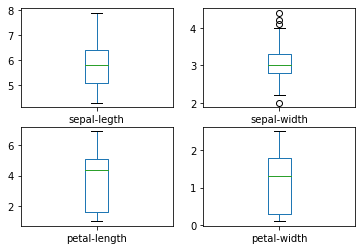

In [13]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dataset.plot(kind ='box',subplots=True,layout=(2,2),sharex=False, 
sharey=False)
plt.show()

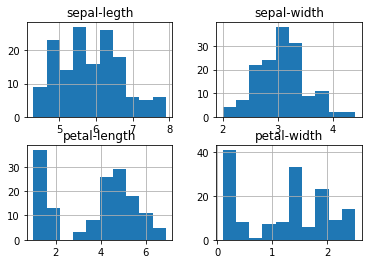

In [14]:
dataset.hist()
plt.show()

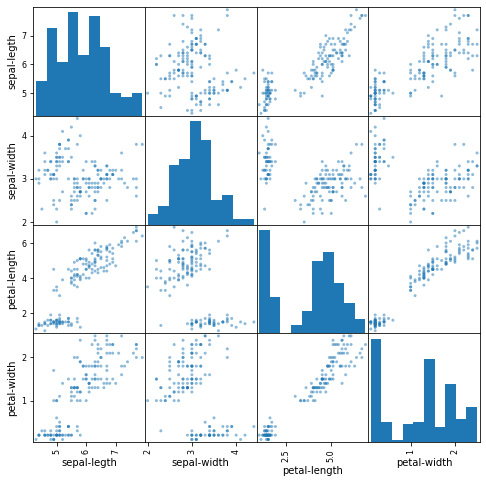

In [17]:
scatter_matrix(dataset,figsize=(8,8))
plt.show()

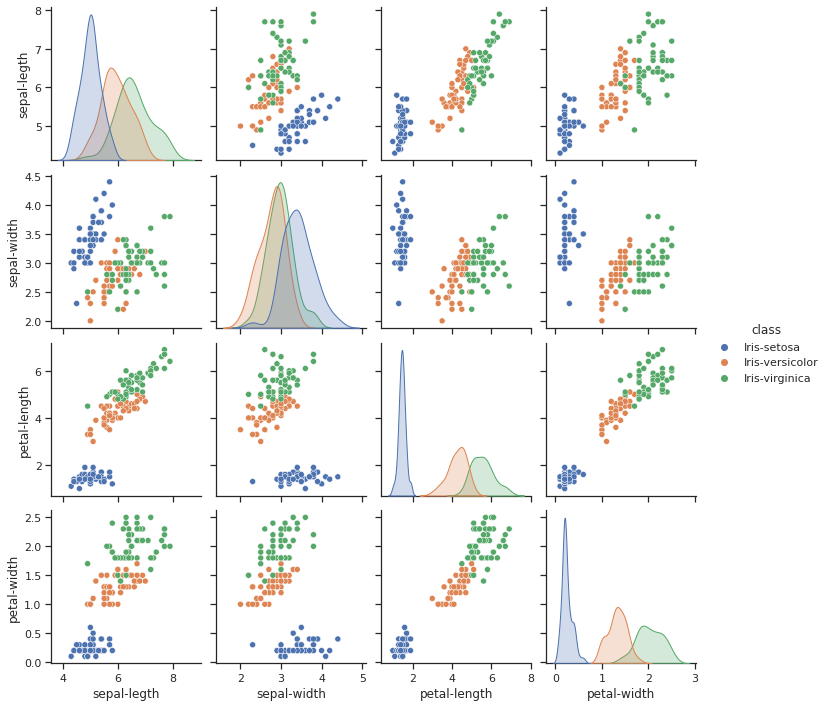

In [18]:
sns.set(style='ticks')
sns.pairplot(dataset, hue ='class')

In [19]:
from sklearn.model_selection import train_test_split
array = dataset.values
X= array[:,0:4]
y= array[:,4]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
from sklearn.model_selection import cross_val_score #Cross validation score
from sklearn.model_selection import StratifiedKFold #KFord Validation
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score #Accuracy Score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [22]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))



In [27]:
results =[]
names =[]
for name,model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train,y_train,cv=kfold, scoring='accuracy') 
  results.append(cv_results)
  names.append(name)
  print('%s %f' % (name,cv_results.mean()))

LR 0.941667
LDA 0.975000
KNN 0.958333
CART 0.950000
NB 0.950000
SVM 0.983333


<function matplotlib.pyplot.show>

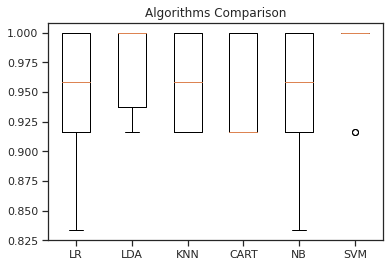

In [28]:
plt.boxplot(results, labels=names)
plt.title("Algorithms Comparison")
plt.show

In [30]:
model = SVC(gamma='auto')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.9666666666666667


In [31]:
print(confusion_matrix(y_test,predictions))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
